In [20]:
import pandas as pd
import numpy as np
import math

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import pandas as pd
import numpy as np

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Droid Serif') 

In [22]:
DATASETS_MAPPING = {
    'nytimes-16-angular': 'NYTimes/16',
    'glove-50-angular': 'GloVe/50',
    'deep-image-96-angular': 'DEEP/96',
    'sift-128-euclidean': 'SIFT/128',
    'glove-200-angular': 'GloVe/200',
    'msong-420': 'MSong/420',
    'har-561': 'HAR/561',
    'contriever-768': 'Contriever/768',
    'instructorxl-arxiv-768': 'arXiv/768',
    'fashion-mnist-784-euclidean': 'F-MNIST/784',
    'gist-960-euclidean': 'GIST/960',
    'openai-1536-angular': 'OpenAI/1536'
}

In [23]:
arch = 'SAPPHIRE'

In [24]:
nary_ads = pd.read_csv(f'../{arch}/PHASES_IVF_NARY_ADSAMPLING_SIMD.csv', index_col=False)
nary_ads['algorithm'] = 'ADS-Nary'

nary_bsa = pd.read_csv(f'../{arch}/PHASES_IVF_NARY_BSA.csv', index_col=False)
nary_bsa['algorithm'] = 'BSA-Nary'

pdx_bsa = pd.read_csv(f'../{arch}/PHASES_IVF_PDX_BSA.csv', index_col=False)
pdx_bsa['algorithm'] = 'BSA-PDX'

pdx_ads = pd.read_csv(f'../{arch}/PHASES_IVF_PDX_ADSAMPLING.csv', index_col=False)
pdx_ads['algorithm'] = 'ADS-PDX'

pdx_bond = pd.read_csv(f'../{arch}/PHASES_IVF_PDX_BOND.csv', index_col=False)
pdx_bond['algorithm'] = 'PDX-BOND'

In [25]:
df = pd.concat([nary_ads, pdx_ads, nary_bsa, pdx_bsa, pdx_bond])

In [26]:
other_cols = df.columns.difference(['ms_query_preprocessing'])
df[other_cols] = df[other_cols].round(decimals=2)
df['ms_query_preprocessing'] = df['ms_query_preprocessing'].round(decimals=3)
df

,dataset,algorithm,avg,max,min,recall,ivf_nprobe,epsilon,knn,n_queries,...,max_all,min_all,ms_nearest_bucket,ms_bounds_evaluation,ms_distance_calculation,ms_query_preprocessing,%_nearest_bucket,%_bounds_evaluation,%_distance_calculation,%_query_preprocessing
0,sift-128-euclidean,ADS-Nary,11.81,23.12,5.56,1.00,512,2.1,10,10000,...,29.72,5.56,0.23,1.64,3.90,0.005,3.94,28.38,67.59,0.09
1,sift-128-euclidean,ADS-Nary,7.15,14.37,2.75,1.00,256,2.1,10,10000,...,17.00,2.75,0.17,1.23,2.37,0.004,4.41,32.59,62.89,0.11
2,sift-128-euclidean,ADS-Nary,4.29,8.49,1.37,0.99,128,2.1,10,10000,...,9.75,1.37,0.10,0.87,1.38,0.003,4.11,37.12,58.66,0.11
3,sift-128-euclidean,ADS-Nary,2.56,4.86,0.71,0.97,64,2.1,10,10000,...,5.96,0.71,0.08,0.58,0.79,0.002,5.52,39.83,54.47,0.17
4,sift-128-euclidean,ADS-Nary,1.56,2.80,0.42,0.93,32,2.1,10,10000,...,3.63,0.42,0.07,0.38,0.47,0.002,7.90,40.79,51.05,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,openai-1536-angular,PDX-BOND,3.67,4.91,2.29,0.88,32,0.0,10,1000,...,4.91,1.58,0.74,0.03,3.57,0.003,17.03,0.71,82.18,0.08
41,openai-1536-angular,PDX-BOND,2.52,3.18,1.84,0.83,16,0.0,10,1000,...,3.50,1.40,0.93,0.06,2.26,0.003,28.72,1.70,69.48,0.10
42,openai-1536-angular,PDX-BOND,1.73,2.10,1.33,0.78,8,0.0,10,1000,...,2.35,1.16,0.88,0.05,1.50,0.003,36.23,1.93,61.70,0.14
43,openai-1536-angular,PDX-BOND,1.28,1.54,1.00,0.70,4,0.0,10,1000,...,1.67,0.90,0.82,0.04,1.07,0.003,42.49,2.16,55.18,0.16


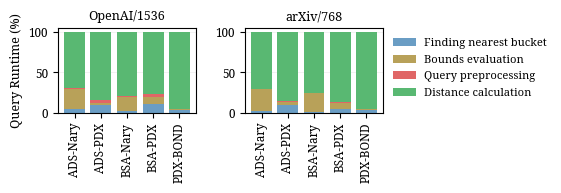

In [243]:
fig, (
    (ax1, ax2)
) = plt.subplots(1, 2)
plots = [
    ax1, 
    ax2
]

fig.set_size_inches(4.2, 1.1)
plt.subplots_adjust(hspace=0.20, wspace=0.35)
matplotlib.rcParams['hatch.linewidth'] = 0.2

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#6a9dc4", "#cf9dcd", "#B8A159", "#dedede", "#e06666", "#5970B8", "#59b872",])
patterns =('///', '\\\\\\', 'xxx','ooo', '+++', '|||', '***', '---')

ivf_nprobe = 512

metadata = {    
    # "ms_nearest_bucket",
    # "ms_bounds_evaluation",
    # "ms_query_preprocessing",
    "%_nearest_bucket": "Finding nearest bucket",
    "%_bounds_evaluation": "Bounds evaluation",
    "%_query_preprocessing": "Query preprocessing",
    "%_distance_calculation": "Distance calculation"
}
to_plot = list(metadata.keys())
labels = list(metadata.values())

for i, dataset in enumerate([
    'openai-1536-angular', 
    'instructorxl-arxiv-768'
]):
    ax = plots[i]    
    dataset_name = DATASETS_MAPPING[dataset]
    tmp = df[(df['dataset'] == dataset) & (df['ivf_nprobe'] == ivf_nprobe)]
    tmp.plot.bar(
        x='algorithm',
        y=to_plot,
        ax=ax,
        colormap=cmap,
        width=0.8,
        stacked=True
    )
    ax.tick_params(axis='x', labelrotation=90, labelsize=8.5)
    ax.tick_params(axis='y', labelrotation=0, labelsize=8.5)
    ax.set_xlabel("")
    ax.set_ylabel("Query Runtime (%)", fontsize=9)
    ax.yaxis.grid(linewidth=0.5, color='#ededed')
    ax.set_axisbelow(True)
    # ax.set_ylim(0, ax1.get_ylim()[1])
    ax.set_title(dataset_name, fontsize=9)
    # ax.yaxis.set_major_formatter('{x:1.0f}%')

    
    ax.legend(
        labels=labels,
        loc="upper left",
        prop={'size': 8},
        ncols=1,
        frameon=False,
        bbox_to_anchor=(2.35,1.0),
        markerscale=1.3
    )

    if i != 0:
        ax.legend().remove()
    if i != 0:
        ax.set_ylabel('')
    
    # index1 = 2
    # index2 = 6
    # pop = np.array(tmp1['query'])
    # h = max(pop[index1:index2+1]) # maximum of the involved bar heights
    # bx = [index1-0.5, index1-0.5, index2+0.5, index2+0.5]
    # by = [h + 2, h + 5, h + 5, h + 2]
    # ax.plot(bx, by, 'k-', lw=0.4)
    # ax.text((index1 + index2) / 2, h + 7, f'{sum(pop[index1:index2+1]):.0f}% of queries', size=7.5, ha='center', va='bottom')
    # bars1 = ax.patches
    # bars1[1].set_color('#dedede')
    # bars1[0].set_color('#B8A159')

# fig.supxlabel('Runtime improvement factor', fontsize=9, x=0.5, y=-0.33)
# plt.savefig(f'./figures/PHASES_{arch}.png', bbox_inches='tight', dpi=600)

In [27]:
metadata = {    
    # "ms_nearest_bucket",
    # "ms_bounds_evaluation",
    # "ms_query_preprocessing",
    "%_distance_calculation": "Distance calculation",
    "%_nearest_bucket": "Finding nearest bucket",
    "%_bounds_evaluation": "Bounds evaluation",
    "%_query_preprocessing": "Query preprocessing",
}

to_plot = list(metadata.keys())
labels = list(metadata.values())

In [32]:
ivf_nprobe = 128
dataset = 'openai-1536-angular'
#dataset = 'msong-420' 
#dataset = 'instructorxl-arxiv-768' 
#dataset = 'sift-128-euclidean' 
dataset_name = DATASETS_MAPPING[dataset]
tmp = df[(df['dataset'] == dataset) & (df['ivf_nprobe'] == ivf_nprobe)]
tmp = tmp[['dataset', 'algorithm', 'recall', 'avg', 'ms_bounds_evaluation'] + to_plot]
tmp['Distance calculation'] = tmp['%_distance_calculation'].astype(str) + "% (" + ((tmp['avg'] * tmp['%_distance_calculation'] / 100).round(decimals=3)).astype(str) + "ms)"
tmp['Finding nearest buckets'] = tmp['%_nearest_bucket'].astype(str) + "% (" + ((tmp['avg'] * tmp['%_nearest_bucket'] / 100).round(decimals=3)).astype(str) + "ms)"
tmp['Bounds evaluation'] = tmp['%_bounds_evaluation'].astype(str) + "% (" + ((tmp['avg'] * tmp['%_bounds_evaluation'] / 100).round(decimals=2)).astype(str) + "ms)"
tmp['Query preprocessing'] = tmp['%_query_preprocessing'].astype(str) + "% (" + ((tmp['avg'] * tmp['%_query_preprocessing'] / 100).round(decimals=3)).astype(str) + "ms)"
tmp[['dataset', 'algorithm',  'recall', 'avg', 'Distance calculation', 'Finding nearest buckets', 'Bounds evaluation', 'Query preprocessing']]

,dataset,algorithm,recall,avg,Distance calculation,Finding nearest buckets,Bounds evaluation,Query preprocessing
38,openai-1536-angular,ADS-Nary,0.95,17.92,64.79% (11.61ms),6.76% (1.211ms),26.28% (4.71ms),2.17% (0.389ms)
38,openai-1536-angular,ADS-PDX,0.95,4.56,73.19% (3.337ms),18.5% (0.844ms),1.87% (0.09ms),6.45% (0.294ms)
38,openai-1536-angular,BSA-Nary,0.95,25.53,76.51% (19.533ms),4.46% (1.139ms),17.56% (4.48ms),1.48% (0.378ms)
38,openai-1536-angular,BSA-PDX,0.95,3.85,70.07% (2.698ms),17.65% (0.68ms),5.93% (0.23ms),6.35% (0.244ms)
38,openai-1536-angular,PDX-BOND,0.95,11.01,91.91% (10.119ms),7.02% (0.773ms),1.04% (0.11ms),0.03% (0.003ms)
